#### Project 1: Image Enhancement Project

In [1]:
# Import libraries.
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

# Function for user sign up.
def sign_up():
    while True:
        # Collect user's username and matric number.
        username = input("\nEnter your username or 'quit' to return to the main menu: ")
        if username.lower() == 'quit':
            print("\nReturning to the main menu...")
            return False

        matno = input("Enter your matric number: ")

        # Save user's credentials to a file.
        with open("database/credentials/user_credentials.txt", "a") as file:
            file.write(f"{username},{matno}\n")

        print("\nSign up successful!")
        return True


# Function for user login.
def login():
    # Load existing user credentials from file.
    user_credentials = {}
    with open("database/credentials/user_credentials.txt", "r") as file:
        for line in file:
            username, matno = line.strip().split(",")
            user_credentials[username] = matno

    while True:
        # Request username and matric number from the user.
        username = input("\nEnter your username or 'quit' to exit: ")
        if username.lower() == 'quit':
            print("\nExiting login process.")
            return False

        matno = input("Enter your matric number: ")

        # Check if username and matric number match.
        if username in user_credentials and user_credentials[username] == matno:
            print("\nLogin successful!")
            return username
        else:
            print("\nInvalid username or matric number. Please try again.")



In [2]:
# Function for selecting default image.
def display(position, title, image):
    plt.subplot(1, 2, position)
    plt.title(title)
    plt.imshow(image)
    plt.show()


def select_default():
    print("\n\n\nPlease choose a default image to enhance your image.\n")
    while True:
        default = {
            '1': 'chukwudi',
            '2': 'donkey',
            '3': 'enase',
            '4': 'shrek',
            '5': 'tinubu'
        }
        print("Make a choice by entering the corresponding number:")
        print("1 --- 'CHUKWUDI: Creator of this app.'\n2 --- 'DONKEY: A Hollywood icon.'\n3 --- 'PROF. ENASE: VC of PAU'\n")
        print("3 --- 'SHREK: A green ogre.'\n5 --- 'TINUBU: President of Nigeria.'\n6 --- 'RANDOM: random selection'\n\n\n")
        choice = input("Choice: ")

        if 1 <= int(choice) <= 6:
            if choice == "6":
                choice = random.choice(list(default.keys()))
                break
            else:
                break
        else:
            print("Invalid choice. Please enter a number between 1 and 6:")

    image_path = f"/Users/chudi/Documents/study/school/final/csc418/github-repo/cofomacsc418/week-2/database/images/default/{default[choice]}.jpg"
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        display(1, f"{default[choice].upper()}'S PORTRAIT", img)
        print("\n[Default image selected.]\n")
        return img
    else:
        print("Default image no longer exists.")


# Function for visualisation of colors.
def visualize_colors(username, image):
    print('\nVISUALISATION OF COLORS')
    
    # The split method separates color spaces.
    B, G, R = cv2.split(image)
    
    # Corresponding channels are separated.
    print('\nDisplaying the original image...\n')
    cv2.imshow(f"{username.upper()}'S PORTRAIT", image)

    print('\nDisplaying blue...\n')
    cv2.imshow('BLUE', B)

    print('\nDisplaying green...\n')
    cv2.imshow('GREEN', G)

    print('\nDisplaying red...\n')
    cv2.imshow('RED', R)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# Function for arithmetic operations.
def arithmetic_operations(username, image):
    print('\nARITHMETIC OPERATIONS')
    
    # Path to input images.
    image1 = image
    image2 = select_default()
    
    # cv2.addWeighted with applied parameters.
    addImages = cv2.addWeighted(image1, 0.5, image2, 0.6, 0)
    subImages = cv2.subtract(image1, image2)
    
    # Plot input and output images.
    display(1, f"{username.upper()}'S PORTRAIT", image1)
    display(2, 'DEFAULT IMAGE', image2)
    
    display(1, 'ADDED IMAGES', addImages)
    display(2, 'SUBTRACTED IMAGES', subImages)

    # # Display in window.
    # print('\nDisplaying the added image...\n')
    # cv2.imshow('Weighted Image:', addImages)

    # print('\nDisplaying the subtracted image...\n')
    # cv2.imshow('Weighted Image:', addImages)

# Function for adjusting contrast and brightness.
def adjust_contrast_brightness(username, image):
    print('\nCONTRAST AND BRIGHTNESS ADJUSTMENT')
    # Plot the original.
    display(1, f"{username.upper()}'S PORTRAIT", image)
    
    # Adjust the brightness and contrast.
    brightness = 5
    contrast = 1.5
    
    image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
    
    # Save the image.
    cv2.imwrite('output/project-1/contrast_image.jpg', image2)
    
    # Plot the contrast image.
    display(2, 'BRIGHTNESS & CONTRAST', image2)


# Function for image sharpening.
def sharpen_image(username, image):
    print('\nIMAGE SHARPENING')
    # Plot original.
    display(1, f"{username.upper()}'S PORTRAIT", image)
    
    # Create the sharpening kernel.
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    # Sharpen the image.
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    # Save the image.
    cv2.imwrite('output/project-1/sharpened_image.jpg', sharpened_image)
    
    # Plot the sharpened image.
    display(2, 'SHARPENED IMAGE', sharpened_image)


# Function for removing noise.
def remove_noise(username, image):
    print('\nNOISE REMOVAL')
    # Plot the original.
    display(1, f"{username.upper()}'S PORTRAIT", image)
    
    # Remove noise using median filter
    filtered_image = cv2.medianBlur(image, 15)
    
    # Save the image
    cv2.imwrite('output/project-1/filtered_image.jpg', filtered_image)
    
    # Plot the blurred image
    display(2, 'MEDIAN BLUR', filtered_image)

# Function for image scaling.
def scale_image(username, image):
    print('\nIMAGE SCALING')
    # Plot the original.
    display(1, f"{username.upper()}'S PORTRAIT", image)
    
    # Scale the image by a factor of 2 along both axes.
    scaled_image = cv2.resize(image, None, fx=2, fy=2)
    
    # Save the image.
    cv2.imwrite('output/project-1/scaled_image.jpg', scaled_image)
    
    # Plot the scaled image.
    display(2, 'SCALED IMAGE', scaled_image)


# Function for inverse transformation.
def inverse_transformation(username, image):
    print('\nINVERSE TRANSFORMATION')
    # Plot the original image.
    display(1, f"{username.upper()}'S PORTRAIT", image)
    
    # Inverse by subtracting from 255.
    inverse_image = 255 - image
    
    # Save the image.
    cv2.imwrite('output/project-1/inverse_image.jpg', inverse_image)
    
    # Plot the inverse image.
    display(2, 'INVERSE COLOR', inverse_image)


# Function for image viewer.
def view_image(username, image):
    print('\nIMAGE VIEWER')
    display(1, f"{username.upper()}'S PORTRAIT", image)
    return True


# Function to perform image enhancement based on user's choice
def enhance_image(username, image, enhancement_choice):
    enhancements = {
        "1": visualize_colors,
        "2": arithmetic_operations,
        "3": adjust_contrast_brightness,
        "4": sharpen_image,
        "5": remove_noise,
        "6": scale_image,
        "7": inverse_transformation,
        "8": view_image
    }

    # Check if enhancement_choice is valid
    if enhancement_choice in enhancements:
        enhancements[enhancement_choice](username, image)
    else:
        print("Invalid enhancement choice.")



Welcome to the Image Enhancement Application!

MAIN MENU
Please make a choice by entering the corresponding number:
1 --- 'Sign up'
2 --- 'Sign in'
3 --- 'Quit'





Choice:  1

Enter your username or 'quit' to return to the main menu:  quit



Returning to the main menu...

MAIN MENU
Please make a choice by entering the corresponding number:
1 --- 'Sign up'
2 --- 'Sign in'
3 --- 'Quit'





Choice:  2

Enter your username or 'quit' to exit:  david
Enter your matric number:  201206120230



Login successful!

What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  1



VISUALISATION OF COLORS

Displaying the original image...


Displaying blue...


Displaying green...


Displaying red...


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  2



ARITHMETIC OPERATIONS



Please choose a default image to enhance your image.

Make a choice by entering the corresponding number:
1 --- 'CHUKWUDI: Creator of this app.'
2 --- 'DONKEY: A Hollywood icon.'
3 --- 'PROF. ENASE: VC of PAU'

3 --- 'SHREK: A green ogre.'
5 --- 'TINUBU: President of Nigeria.'
6 --- 'RANDOM: random selection'





Choice:  6


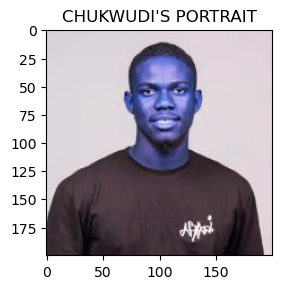


[Default image selected.]



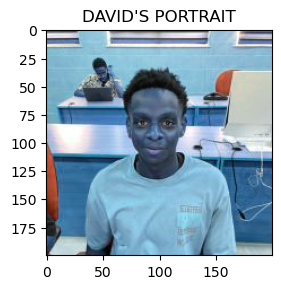

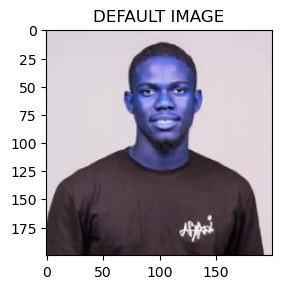

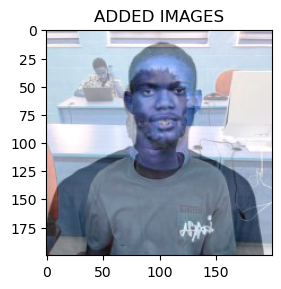

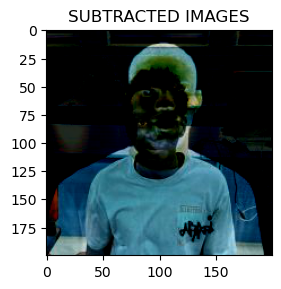


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  3



CONTRAST AND BRIGHTNESS ADJUSTMENT


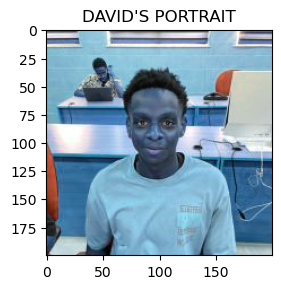

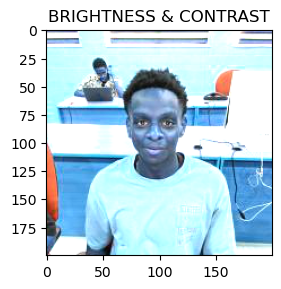


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  4



IMAGE SHARPENING


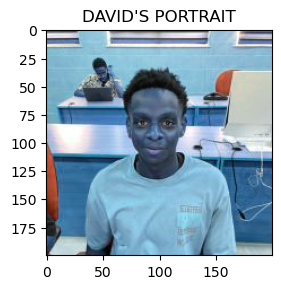

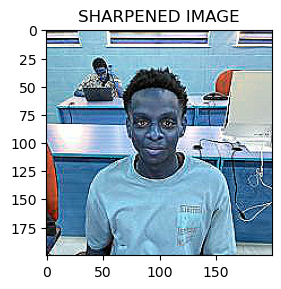


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  5



NOISE REMOVAL


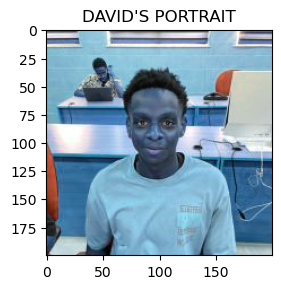

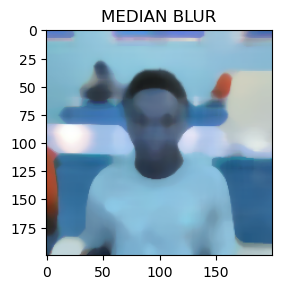


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  6



IMAGE SCALING


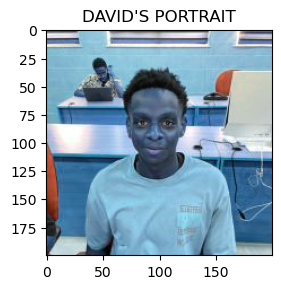

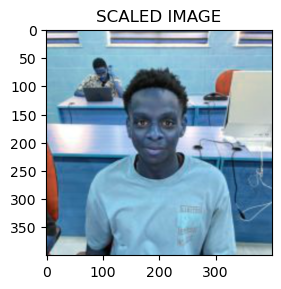


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  7



INVERSE TRANSFORMATION


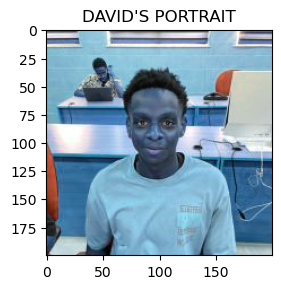

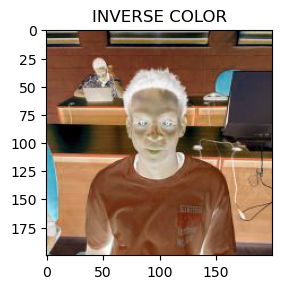


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  8



IMAGE VIEWER


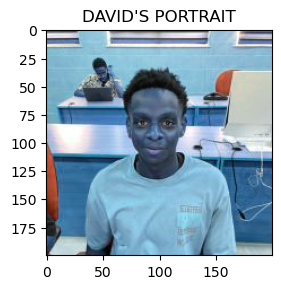


What would you like to do on your image?
1 --- 'Visualise colors'
2 --- 'Arithmetic operations'
3 --- 'Adjust contrast & brightness'

4 --- 'Sharpen image'
5 --- 'Remove noise'
6 --- 'Scale image'

7 --- 'Inverse transformation'
8 --- 'View image'
9 --- 'Log out'





Choice:  9



Logging you out...




MAIN MENU
Please make a choice by entering the corresponding number:
1 --- 'Sign up'
2 --- 'Sign in'
3 --- 'Quit'





Choice:  3


Exiting the Image Enhancement Application...


In [3]:
# Main function to execute the application
def main():
    print("Welcome to the Image Enhancement Application!")
    while True:
        # Ask the user to sign up, log in, or quit
        print("\nMAIN MENU")
        print("Please make a choice by entering the corresponding number:")
        print("1 --- 'Sign up'\n2 --- 'Sign in'\n3 --- 'Quit'\n\n\n")
        choice = input("Choice: ")

        if choice == "1":
            sign_up()
        elif choice == "2":
            username = login()
            if username:
                while True:
                    # Continuously prompt the user to choose an enhancement technique or quit
                    print("\nWhat would you like to do on your image?")
                    print("1 --- 'Visualise colors'\n2 --- 'Arithmetic operations'\n3 --- 'Adjust contrast & brightness'\n")
                    print("4 --- 'Sharpen image'\n5 --- 'Remove noise'\n6 --- 'Scale image'\n")
                    print("7 --- 'Inverse transformation'\n8 --- 'View image'\n9 --- 'Log out'\n\n\n")
                    enhancement_choice = input("Choice: ")
                    # Check if the input is a valid choice (a number between 1 and 9)
                    if enhancement_choice.isdigit() and 1 <= int(enhancement_choice) <= 9:
                        if enhancement_choice == "9":
                            print('\nLogging you out...\n\n\n')
                            break
                        else:
                            # Perform selected enhancement on the user's image
                            image_path = f"/Users/chudi/Documents/study/school/final/csc418/github-repo/cofomacsc418/week-2/database/images/members/{username}.jpg"
                            if os.path.exists(image_path):
                                img = cv2.imread(image_path)
                                enhance_image(username, img, enhancement_choice)
                            else:
                                print("Image not found.")
                    else:
                        print("Invalid choice. Please enter a number between 1 and 9:")
        elif choice == "3":
            print("Exiting the Image Enhancement Application...")
            break
        else:
            print("Invalid choice. Please try again.")


# Execute the main function
if __name__ == "__main__":
    main()

